Dependecies: Add your Dependencies here

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']= 10,10

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,NaN,NaN
1,1,0.174377,22,1,1,1,280.0,0.0
2,0,0.000000,22,0,0,0,1500.0,0.0
3,1,0.000000,23,98,98,98,NaN,0.0
4,1,111.000000,23,0,1,2,NaN,0.0
...,...,...,...,...,...,...,...,...
994,0,0.065758,89,0,0,0,10416.0,0.0
995,0,0.019423,90,0,0,0,3500.0,0.0
996,0,0.173890,91,0,0,0,5767.0,0.0
997,0,32.000000,92,0,0,0,NaN,0.0


Read the dataset from the CSV file

In [14]:
dic = {'Serious_Dlq_in_2yrs':0,'Debt_Ratio':0.24,'age':23,'Number_Of_Time_30-59_Days_Past_Due':0,'Number_Of_Time_60-89_Days_Past_Due':0,'Number_Of_Times_90_Days_Late':0,'Monthly_Income':78,'Dependents':0}
data = pd.DataFrame(dic,index=[0])
df=pd.read_csv("credit_scoring_sample.csv")
df

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,NaN,NaN
1,1,0.174377,22,1,1,1,280.0,0.0
2,0,0.000000,22,0,0,0,1500.0,0.0
3,1,0.000000,23,98,98,98,NaN,0.0
4,1,111.000000,23,0,1,2,NaN,0.0
...,...,...,...,...,...,...,...,...
994,0,0.065758,89,0,0,0,10416.0,0.0
995,0,0.019423,90,0,0,0,3500.0,0.0
996,0,0.173890,91,0,0,0,5767.0,0.0
997,0,32.000000,92,0,0,0,NaN,0.0


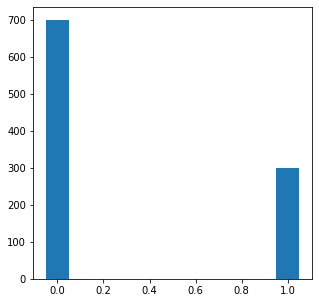

In [15]:
# Plot Distrubution of the target variable
values,counts=np.unique(df.iloc[:,0],return_counts=True)
plt.figure(figsize=(5,5))
plt.bar(values,counts,width=0.1)

#plt.scatter(df.index,df['Serious_Dlq_in_2yrs'])
plt.show()

In [16]:
# Handle the NaN values
df.fillna(df.mean(),inplace=True)
df

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,6182.567036,0.780738
1,1,0.174377,22,1,1,1,280.000000,0.000000
2,0,0.000000,22,0,0,0,1500.000000,0.000000
3,1,0.000000,23,98,98,98,6182.567036,0.000000
4,1,111.000000,23,0,1,2,6182.567036,0.000000
...,...,...,...,...,...,...,...,...
994,0,0.065758,89,0,0,0,10416.000000,0.000000
995,0,0.019423,90,0,0,0,3500.000000,0.000000
996,0,0.173890,91,0,0,0,5767.000000,0.000000
997,0,32.000000,92,0,0,0,6182.567036,0.000000


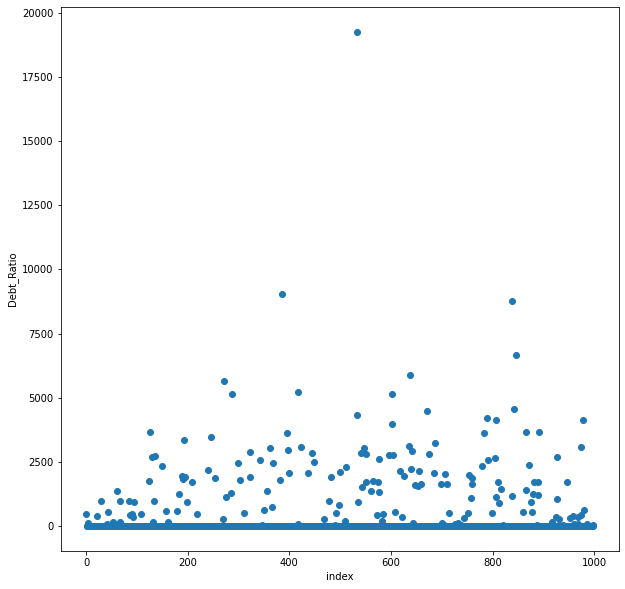

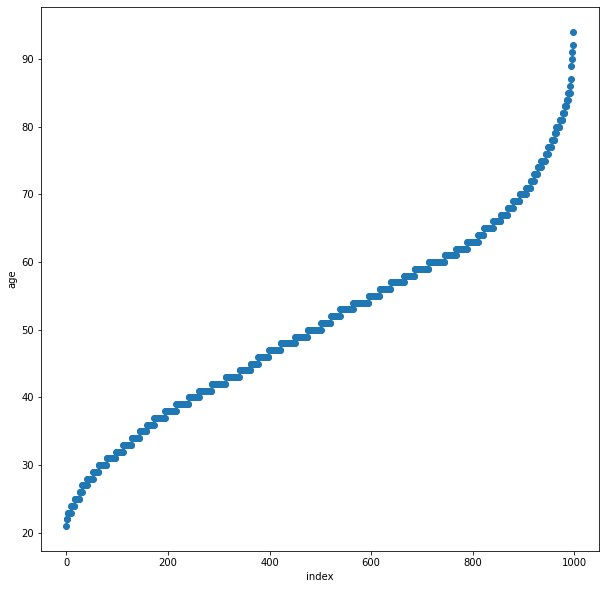

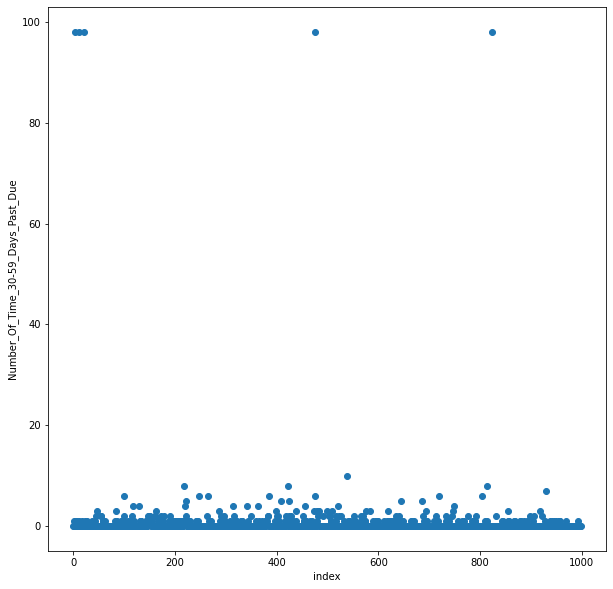

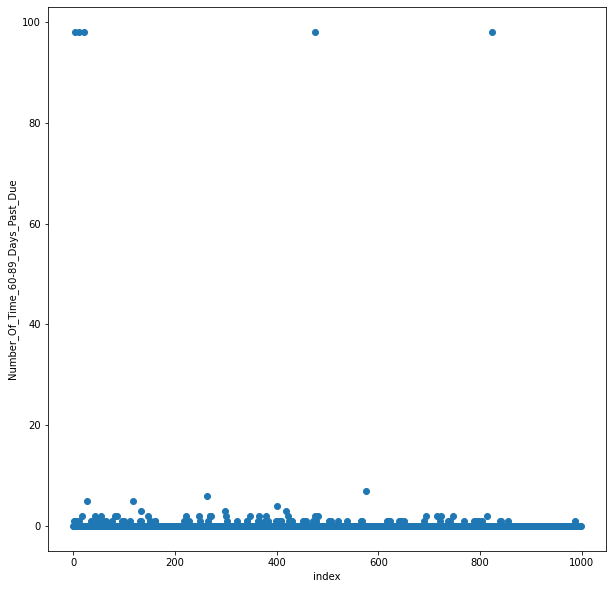

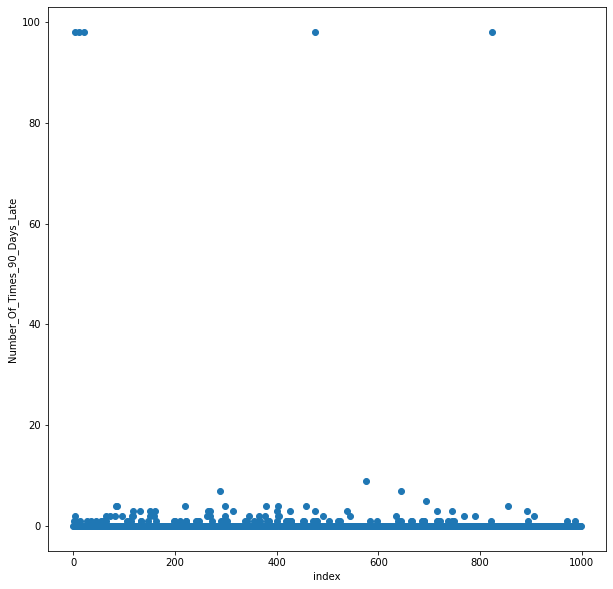

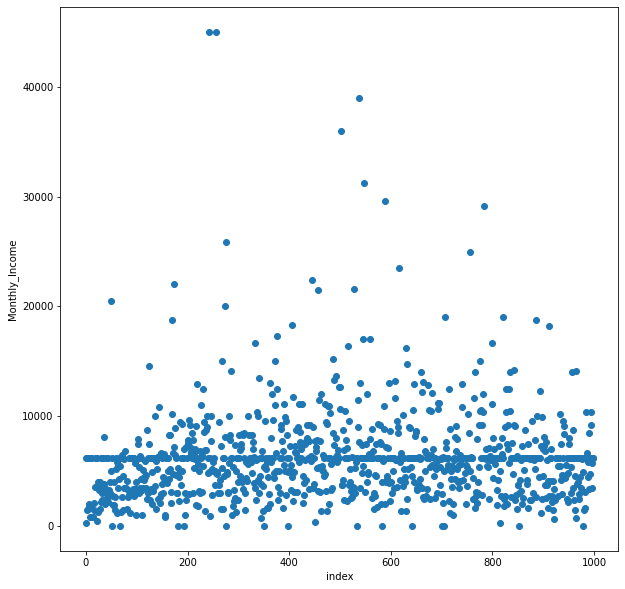

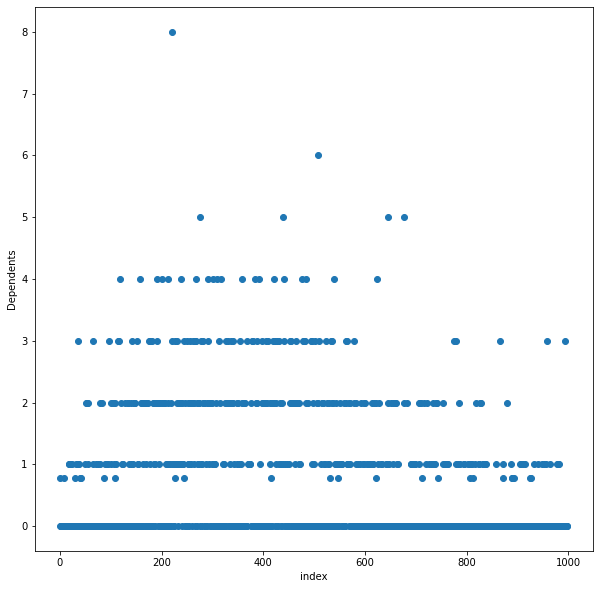

In [17]:
# Visualize the distribution of data for every feature
for x in df.columns:
  if x != "Serious_Dlq_in_2yrs":
    plt.xlabel("index")
    plt.ylabel(x)
    plt.scatter(df.index,df[x])
    plt.show()
    print('\n')

Train the Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split



In [19]:
# seperate depedendent and independent variables from the dataset
x=df.iloc[:,1:]
y=df.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)
y


0      0
1      1
2      0
3      1
4      1
      ..
994    0
995    0
996    0
997    0
998    0
Name: Serious_Dlq_in_2yrs, Length: 999, dtype: int64

Testing score :  0.806060606060606
Training score :  1.0


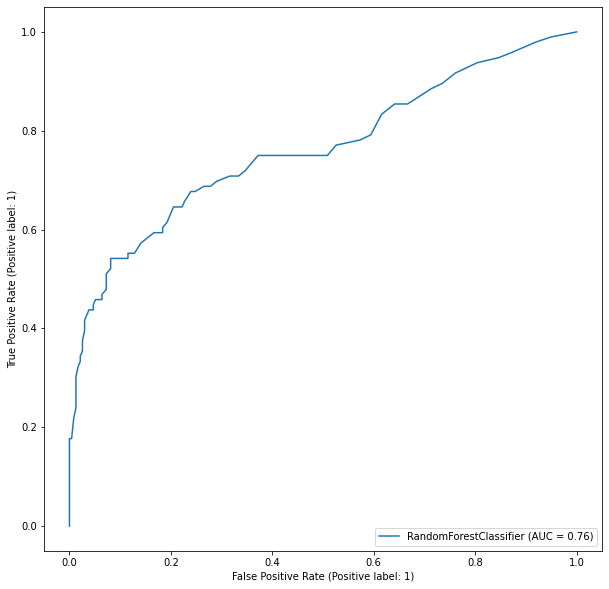

In [20]:
# define paramerts for the random forest
from sklearn.metrics import plot_roc_curve,auc,roc_auc_score
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5,10,15]}
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
print("Testing score : ", rf.score(x_test,y_test))
print("Training score : ",rf.score(x_train,y_train))
plot_roc_curve(rf,x_test,y_test)

In [21]:
# perform cross validation
def getscore(model,x_train,y_train,x_test,y_test):
  model.fit(x_train,y_train)
  return model.score(x_test,y_test)
score_arr = []
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
for train,test in skf.split(x,y):
  x_train1,x_test1 = x.iloc[train,:],x.iloc[test,:]
  y_train1 , y_test1 = y[train],y[test]
  score_arr.append(getscore(rf,x_train1,y_train1,x_test1,y_test1))
print(score_arr)

[0.78, 0.805, 0.785, 0.76, 0.7839195979899497]


In [22]:
# perform grid search
grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search.fit(x_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [1, 2, 4],
                         'min_samples_leaf': [3, 5, 7, 9]},
             scoring='roc_auc')

Best score: 0.8169879360083925


Text(0, 0.5, 'crossvalidation score')

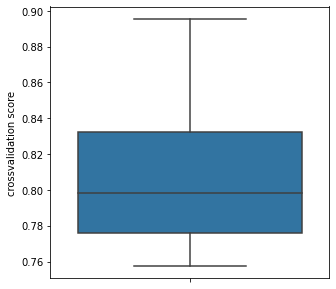

In [23]:
#Get the best score from the grid search
from sklearn.model_selection import cross_val_score

print("Best score:",grid_search.best_score_)
cv = cross_val_score(grid_search.best_estimator_,x_train,y_train,cv=10)
plt.figure(figsize=(5,5))
bx1 = sns.boxplot(y = cv)
plt.ylabel("crossvalidation score")

In [24]:
# Find the feature which has the weakest impact in Random Forest Model
imp = grid_search.best_estimator_.feature_importances_
mina=imp[0]
n=" "
for i in range(len(x_train.keys())):
    if(mina>imp[i]):
        mina=imp[i]
        n =x_train.keys()[i]
print("Least importance feature:",n)



Least importance feature: Dependents


In [25]:
# Perform bagging classification using decision trees as the base classifier

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
cf1=DecisionTreeClassifier(max_depth=2)
bagging=BaggingClassifier(base_estimator=cf1,n_estimators=100,max_features=1,random_state=5)
bagging.fit(x_train,y_train)
print(bagging.score(x_test,y_test))
print(bagging.estimators_)

0.7666666666666667
[DecisionTreeClassifier(max_depth=2, random_state=1228472244), DecisionTreeClassifier(max_depth=2, random_state=1538648557), DecisionTreeClassifier(max_depth=2, random_state=1291004499), DecisionTreeClassifier(max_depth=2, random_state=378811896), DecisionTreeClassifier(max_depth=2, random_state=1715738999), DecisionTreeClassifier(max_depth=2, random_state=1655026361), DecisionTreeClassifier(max_depth=2, random_state=1482370082), DecisionTreeClassifier(max_depth=2, random_state=1085858423), DecisionTreeClassifier(max_depth=2, random_state=690222301), DecisionTreeClassifier(max_depth=2, random_state=1739948426), DecisionTreeClassifier(max_depth=2, random_state=1054112299), DecisionTreeClassifier(max_depth=2, random_state=1748058408), DecisionTreeClassifier(max_depth=2, random_state=658601627), DecisionTreeClassifier(max_depth=2, random_state=1106075865), DecisionTreeClassifier(max_depth=2, random_state=571025500), DecisionTreeClassifier(max_depth=2, random_state=14077

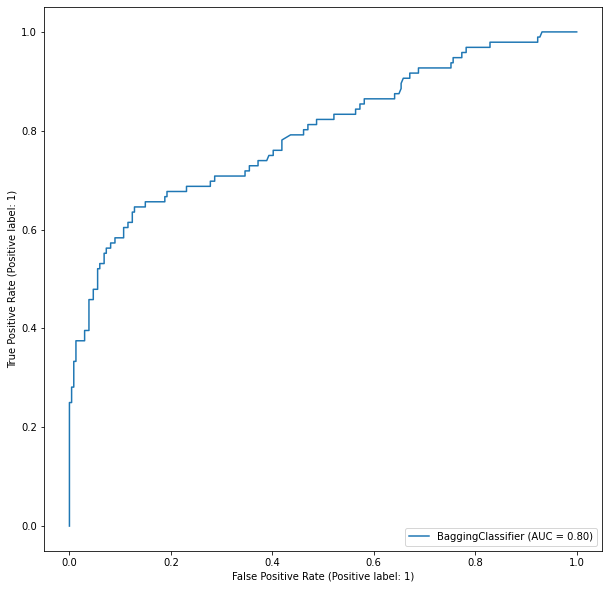

In [27]:
plot_roc_curve(bagging,x_test,y_test)

In [28]:
# get a list of models to evaluate
def get_models():
	return [BaggingClassifier(n_estimators= 10*i+1) for i in range(2,7,1)]

In [29]:
# evaluate a given model using cross-validation
scores=[]
def evaluate_model(model, X, Y):
	for i in model:
		scores.append(cross_val_score(i,X,Y,cv=10))
	# write your code here

	return scores

In [30]:
# Summarize the performance by getting mean and standard deviation of scores
scores1 = evaluate_model(get_models(),x,y)
best = []
mean_ = 0
for scores in scores1:
  arr = np.array(scores)
  print("mean is : ",arr.mean())
  if(mean_ < arr.mean()):
    mean_ = arr.mean()
    best = scores
  print("standard deviation is : " ,arr.std())

print(scores1)
print(best)

mean is :  0.6287777777777779
standard deviation is :  0.1366833323171971
mean is :  0.6077575757575757
standard deviation is :  0.14840091629071184
mean is :  0.5697777777777777
standard deviation is :  0.1675324180900852
mean is :  0.5577575757575757
standard deviation is :  0.18422429137244753
mean is :  0.5917676767676767
standard deviation is :  0.1748535921737138
[array([0.32      , 0.6       , 0.52      , 0.63      , 0.52      ,
       0.71      , 0.7       , 0.73      , 0.78      , 0.77777778]), array([0.32      , 0.6       , 0.65      , 0.42      , 0.45      ,
       0.72      , 0.69      , 0.71      , 0.76      , 0.75757576]), array([0.32      , 0.58      , 0.55      , 0.32      , 0.38      ,
       0.66      , 0.62      , 0.7       , 0.79      , 0.77777778]), array([0.32      , 0.63      , 0.3       , 0.36      , 0.46      ,
       0.76      , 0.49      , 0.71      , 0.79      , 0.75757576]), array([0.32      , 0.58      , 0.63      , 0.34      , 0.37      ,
       0.74     

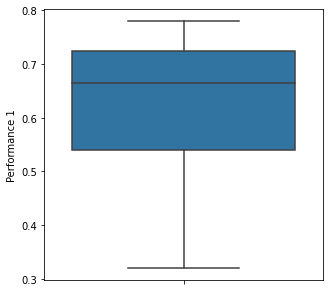

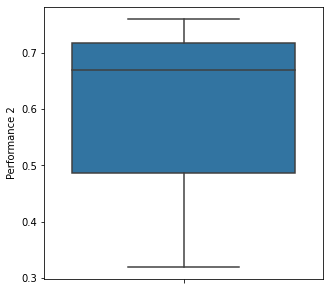

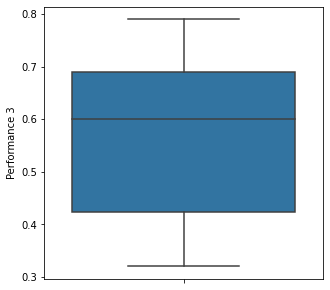

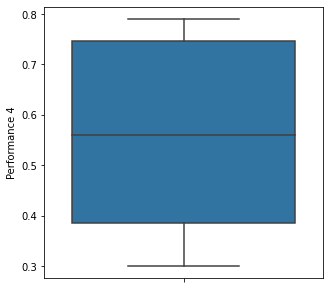

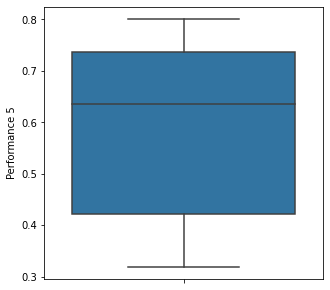

In [31]:
# Plot the model performance for comparison using boxplot
cnt=1
for i in scores1:
    plt.figure(figsize=(5,5))
    b=sns.boxplot(y=i)
    plt.ylabel(f"Performance {cnt}")
    cnt+=1
    plt.show()



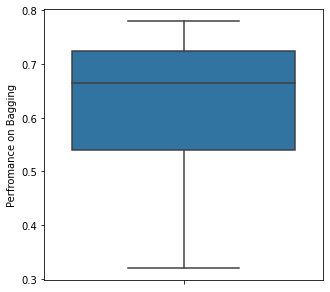

Text(0, 0.5, 'Performance on Random forest')

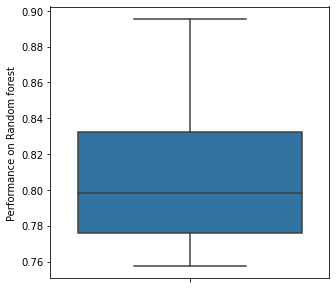

In [32]:
# Compare the best performance of bagging with random forest
plt.figure(figsize=(5,5))
b1 = sns.boxplot(y=best)
plt.ylabel("Perfromance on Bagging")
plt.show()
plt.figure(figsize=(5,5))
bx1 = sns.boxplot(y = cv)
plt.ylabel("Performance on Random forest")

References:-


*   [Decision Tree](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
*   [Seaborn](https://https://https://seaborn.pydata.org/)
*   [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
*   [Stratified Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
*   [Grid Search](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
*   [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) 
*   [Cross Val Score](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)









